In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/btcusdt_1h.csv")
display(df.dtypes)
df["datetime"] = pd.to_datetime(df["datetime"])
df

datetime     object
open        float64
high        float64
low         float64
close       float64
volume      float64
dtype: object

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329
...,...,...,...,...,...,...
35203,2022-01-12 01:30:00,42972.04,43095.26,42692.19,42800.38,1219.601780
35204,2022-01-12 02:30:00,42797.62,42823.69,42643.74,42659.20,702.103800
35205,2022-01-12 03:30:00,42664.71,42776.14,42597.41,42713.13,561.859930
35206,2022-01-12 04:30:00,42713.12,42886.28,42633.97,42729.29,681.142010


## Grouping Data by Day

In [4]:
grouped = df.groupby(df['datetime'].dt.date)

for date, group in grouped:
    print(f"Date: {date}")
    print(group)

Date: 2018-01-01
              datetime      open      high       low     close      volume
0  2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01  443.356199
1  2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06  383.697006
2  2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18  429.064572
3  2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03  420.087030
4  2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01  340.807329
5  2018-01-01 10:30:00  13615.20  13699.00  13526.50  13558.99  404.229046
6  2018-01-01 11:30:00  13539.00  13800.00  13510.00  13780.41  264.989684
7  2018-01-01 12:30:00  13780.00  13818.55  13555.02  13570.35  292.188777
8  2018-01-01 13:30:00  13569.98  13735.24  13400.00  13499.99  271.813553
9  2018-01-01 14:30:00  13499.97  13670.00  13459.11  13616.99  213.095829
10 2018-01-01 15:30:00  13632.00  13657.92  13497.98  13570.01  169.512196
11 2018-01-01 16:30:00  13573.00  13589.89  13001.13  13220.56  665.334353
12 2018-

## Using MACD signal

In [5]:

# period = 24*15
macd, signal, _ = talib.MACD(df["close"], fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['signal'] = signal
display(df)


,datetime,open,high,low,close,volume,macd,signal
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,NaN,NaN
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,NaN,NaN
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,NaN,NaN
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,NaN,NaN
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,NaN,NaN
...,...,...,...,...,...,...,...,...
35203,2022-01-12 01:30:00,42972.04,43095.26,42692.19,42800.38,1219.601780,243.644459,138.135743
35204,2022-01-12 02:30:00,42797.62,42823.69,42643.74,42659.20,702.103800,249.449272,160.398449
35205,2022-01-12 03:30:00,42664.71,42776.14,42597.41,42713.13,561.859930,255.456585,179.410076
35206,2022-01-12 04:30:00,42713.12,42886.28,42633.97,42729.29,681.142010,258.541099,195.236281


1000


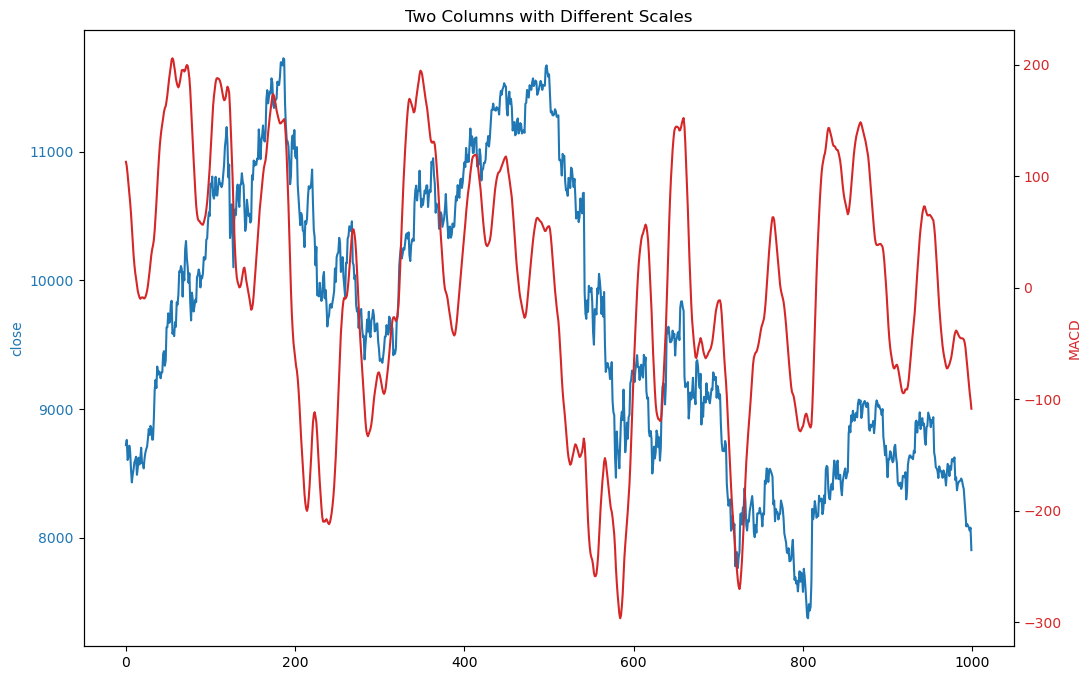

In [6]:
df_slice = df[1000:2000].reset_index()
print(len(df_slice))

# Create a Matplotlib figure and axis
fig, ax1 = plt.subplots(figsize = (12,8))

# Plot the first column on the primary y-axis
# ax1.set_xlabel('Date')
ax1.set_ylabel('close', color='tab:blue')
ax1.plot(df_slice['close'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second column on the secondary y-axis
ax2.set_ylabel('MACD', color='tab:red')
ax2.plot( df_slice['signal'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# ax2.hlines([30, 80], xmin=0, xmax=len(df_slice) - 1, colors='green', linestyles='dotted', label=['Line1', 'Line2'])

# ax3 = ax1.twinx()
# ax3.set_ylabel('Signal', color='tab:green')
# ax3.plot( df_slice['signal'], color='tab:green')
# ax3.tick_params(axis='y', labelcolor='tab:green')

# Set the title and display the plot
plt.title('Two Columns with Different Scales')
plt.xticks(rotation=45)
plt.show()

### Simple MACD reversal

As we can see from the graph above, the 2 curves are correlated (lagged correlations?). One simple strategy is if MACD(t) > MACD(t-1), then we buy and vice versa.
MACD generates 2 indicators, we will look at the signal indicator since it is a smoothened out average.

In [7]:
#flag will be 1, when macd(t) > macd(t-1)
df["flag"] = np.nan
df["flag"].fillna(0, inplace = True)

#generate macd(t-1)
shifted_signal = df['signal'].shift(1)

#update flags
df['flag'] = np.where(df['signal'] > shifted_signal, 1, 0)
df['flag'] = np.where(df['signal'] < shifted_signal, -1, df['flag'])



We now want to only generate 1 buy signal and 1 sell signal, i.e if we have 0,0,0,1,1,1,1,-1,-1,-1,.., we want to change this to 0,0,0,1,0,0,0,-1,0,0
(Edit - Note that this code only generates buy trades effectively, we have to modify to add sell trades as well)

In [8]:
df['logs'] = np.nan
display(df)
compare = 0
for i in range(len(df)):
    # Check if the current value is equal to the specific value.
    
    if df["flag"].iloc[i] == 1 and compare != 1:
        # print("First")
        compare = 1
        df["logs"].iloc[i] = 1

    elif (df["flag"].iloc[i] == 1 and compare == 1):
        # print("Second")
        df["logs"].iloc[i] = 0

    elif (df["flag"].iloc[i] == -1 and compare == -1):
        # print("Second")
        df["logs"].iloc[i] = 0

    elif df["flag"].iloc[i] == -1 and compare != -1:
        # print("Thirs")
        compare = -1
        df["logs"].iloc[i] = -1

    else:
        # print("fourth")
        df["logs"].iloc[i] = 0
    # break
# Fill in any missing values in the new column with 0.
df['logs'].fillna(0, inplace=True)

#close out positions (if needed)
df["logs"].iloc[-1] = -np.sum(df["logs"])



,datetime,open,high,low,close,volume,macd,signal,flag,logs
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,NaN,NaN,0,NaN
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,NaN,NaN,0,NaN
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,NaN,NaN,0,NaN
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,NaN,NaN,0,NaN
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...
35203,2022-01-12 01:30:00,42972.04,43095.26,42692.19,42800.38,1219.601780,243.644459,138.135743,1,NaN
35204,2022-01-12 02:30:00,42797.62,42823.69,42643.74,42659.20,702.103800,249.449272,160.398449,1,NaN
35205,2022-01-12 03:30:00,42664.71,42776.14,42597.41,42713.13,561.859930,255.456585,179.410076,1,NaN
35206,2022-01-12 04:30:00,42713.12,42886.28,42633.97,42729.29,681.142010,258.541099,195.236281,1,NaN


In [10]:
df.to_csv('macd_1hr.csv', columns=['datetime', 'open', 'high', 'low', 'close', 'volume', 'logs'])


In [25]:
df_trades = df[df["logs"] != 0]
print(sum(df_trades["logs"]))

alternate_rows = df_trades.iloc[::2]  # Select every alternate row
remaining_rows = df_trades.iloc[1::2]

display(alternate_rows)
display(remaining_rows)

print(sum(remaining_rows["open"]) - sum(alternate_rows["open"]))



0.0


,datetime,open,high,low,close,volume,macd,signal,flag,logs
34,2018-01-02 15:30:00,13460.00,13617.28,13401.60,13560.00,654.454591,-8.212602,-39.098852,1,1.0
90,2018-01-05 00:30:00,14805.01,14988.00,14720.05,14895.19,862.207466,-10.249523,-31.592721,1,1.0
141,2018-01-07 03:30:00,16790.99,17132.18,16790.00,16975.00,839.510079,169.759590,166.235888,1,1.0
186,2018-01-09 00:30:00,14900.00,15247.33,14781.99,15196.55,516.535040,-376.186961,-397.138385,1,1.0
207,2018-01-09 21:30:00,14655.01,14998.62,14585.01,14951.01,508.127496,-167.668661,-178.196615,1,1.0
...,...,...,...,...,...,...,...,...,...,...
35103,2022-01-07 21:30:00,41310.85,42315.85,40917.66,42135.26,4909.626750,-389.613011,-420.536727,1,1.0
35133,2022-01-09 03:30:00,41769.03,42300.00,41740.31,41911.11,2006.549530,-186.988752,-211.312258,1,1.0
35151,2022-01-09 21:30:00,41621.11,42146.25,41556.49,42143.04,1325.347680,4.355693,-19.933436,1,1.0
35179,2022-01-11 01:30:00,41297.15,41779.46,41158.99,41714.72,1245.440490,-124.116031,-137.997456,1,1.0


,datetime,open,high,low,close,volume,macd,signal,flag,logs
57,2018-01-03 14:30:00,15002.59,15048.00,14440.00,14519.99,1241.904776,334.429426,365.218778,-1,-1.0
121,2018-01-06 07:30:00,17025.03,17073.26,16288.00,16540.99,1172.708274,458.961374,461.978153,-1,-1.0
145,2018-01-07 07:30:00,16951.02,16967.97,16711.00,16742.94,811.636768,165.125782,174.065524,-1,-1.0
203,2018-01-09 17:30:00,14726.00,14829.98,14401.00,14659.57,597.657793,-160.575773,-153.801143,-1,-1.0
213,2018-01-10 03:30:00,14452.00,14536.36,14182.84,14254.92,714.207127,-157.274733,-145.391620,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...
35127,2022-01-08 21:30:00,41609.60,41740.53,41238.08,41346.01,1715.070630,-136.174087,-116.975990,-1,-1.0
35148,2022-01-09 18:30:00,41746.98,41894.01,41469.48,41470.00,922.913360,-24.930323,-20.235894,-1,-1.0
35159,2022-01-10 05:30:00,41864.62,42037.05,41623.67,41655.18,1083.215100,81.963853,90.450280,-1,-1.0
35193,2022-01-11 15:30:00,41984.79,42066.61,41575.00,41631.02,1544.923650,82.357333,83.995581,-1,-1.0


406210.4100000076
